In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [2]:
import os
import sys
import time
import numpy as np
import h5py
from scipy.io import loadmat
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# embeillir les graphique
import seaborn as sns

sns.axes_style()
sns.set_style("whitegrid", {"axes.facecolor": '.95'})
sns.set_context("notebook", rc={'axes.labelsize': 18.0, 'axes.titlesize': 24.0, 'legend.fontsize': 18.0, 'xtick.labelsize': 18.0, 'ytick.labelsize': 18.0})
sns.set_palette("deep")

---
# Fonctions

In [4]:
def a_function(first_argument, second_argument, first_named_argument=0, second_named_argument=None):
    # corps
    if second_named_argument is not None:
        return first_argument+second_argument
    else:
        return first_argument+second_argument, first_argument * first_named_argument

In [5]:
print (a_function(1,2,3))

(3, 3)


In [6]:
print (a_function(1,2, first_named_argument=3))

(3, 3)


In [7]:
a=(1,2)
print (a_function(*a, first_named_argument=3))

(3, 3)


In [8]:
a=(1,2,3)
print (a_function(*a))

(3, 3)


In [9]:
print (a_function(*(1,2,3), second_named_argument=True))

3


In [10]:
print (a_function(first_argument=1, second_argument=2, first_named_argument=3, second_named_argument=True))

3


In [11]:
print (a_function(second_argument=2, first_argument=1, first_named_argument=3, second_named_argument=True))

3


In [12]:
print (a_function(second_argument=2, first_named_argument=3, second_named_argument=True)) # error

TypeError: a_function() missing 1 required positional argument: 'first_argument'

In [13]:
print (a_function(first_argument=1, 2, first_named_argument=3, second_named_argument=True)) # error

SyntaxError: positional argument follows keyword argument (<ipython-input-13-9dcf92643aee>, line 1)

In [14]:
a_dict = {'first_named_argument': 1, 'second_named_argument': True}
print (a_function(1,2, **a_dict))

3


In [15]:
a_dict = {'first_argument': 1, 'second_argument': 2, 'first_named_argument': 1, 'second_named_argument': True}
print (a_function(**a_dict))

3


---
# Classes et inheritance
## Classe simple et scope

In [16]:
class base_class(object): # inherite la classe de base de tous les objects python
    def __init__(self, a):
        self.a = a # variable membre, distingué par le keyword 'self'
        self.__b = 2*a
        c = 4*a
        
    def __local_function(self, x): # fonction locale
        return x * np.pi
        
    def member_function_a(self, x): # fonction membre
        return self.a * x
    
    def member_function_b(self, x): # fonction membre
        return self.__b * x
    
    def member_function_c(self, x): # fonction membre
        return c * x
    
    def member_function_d(self, x): # fonction membre
        return self.__local_function(self.a * x)
    
    def member_function_e(self, x): # fonction membre
        return self.__local_function(a * x)

In [17]:
multiply_by_2 = base_class(2.)
print (multiply_by_2.member_function_a(4))

8.0


In [18]:
print (multiply_by_2.a)

2.0


In [19]:
print (multiply_by_2.__b) # Erreur

AttributeError: 'base_class' object has no attribute '__b'

In [20]:
print (multiply_by_2.member_function_b(4))

16.0


In [21]:
print (multiply_by_2.c) # Erreur

AttributeError: 'base_class' object has no attribute 'c'

In [22]:
print (multiply_by_2.member_function_c(4)) # Erreur

NameError: name 'c' is not defined

In [23]:
print (multiply_by_2.__local_function(4)) # Erreur

AttributeError: 'base_class' object has no attribute '__local_function'

In [24]:
print (multiply_by_2.member_function_d(4))

25.132741228718345


In [25]:
print (multiply_by_2.member_function_e(4)) # Erreur

TypeError: can't multiply sequence by non-int of type 'float'

## Un fonctor est une classe qui fonctione comme une fonction.
Elle utilie use fonction membre de base

In [26]:
class base_class(object):
    def __init__(self, a):
        self.a = a
        
    def __call__(self, x):
        return self.a * x

In [27]:
multiply_by_2 = base_class(2.)
print (multiply_by_2(4))

8.0


## Un example d'inheritance

In [28]:
class subdivision(object):
    def __init__(self, n_div=1, dtype=np.float32):
        self.length = n_div
        self.dtype = dtype
        
    def __call__(self):
        '''	returns a list of point positions '''
        return 'base class'
    
class logspace(subdivision):    
    def __init__(self, n_div, dtype=np.float32, **kwargs):
        super(logspace, self).__init__(n_div, dtype=np.float32, **kwargs)
               
    def __call__(self, start, stop):    
        if self.length <= 1:
            return [start]
        lstart = np.log10(start)
        lstop = np.log10(stop)
        return np.logspace(lstart, lstop, self.length)

In [29]:
print (subdivision(10)())

base class


In [30]:
y = logspace(10)(.1, 100)

print (y)

[  0.1          0.21544347   0.46415888   1.           2.15443469
   4.64158883  10.          21.5443469   46.41588834 100.        ]


Text(0, 0.5, 'log(y)')

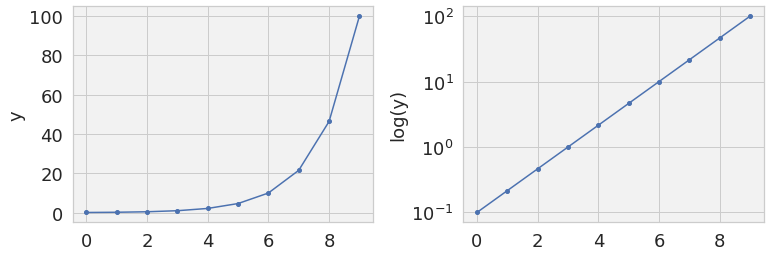

In [31]:
plt.figure(figsize=(12,4))
plt.subplots_adjust(left=0.15, bottom=0.2, right=.95, top=.95, wspace=0.3, hspace=.5)
plt.subplot(1,2,1)
plt.plot(y, marker='o', ms=4)
plt.ylabel('y')
plt.subplot(1,2,2)
plt.plot(y, marker='o', ms=4)
plt.yscale('log')
plt.ylabel('log(y)')

---
# Graph computationel et Autograd

On a maintenant tous les elements necessaire pour commencer à utilizer un outil comme pyTorch ou Tensorflow pour representer des equations complexes et calculer les gradient par rapport à n'importe quelle variable.

In [32]:
import torch

## Equation simple

In [33]:
_x = torch.tensor(3.).requires_grad_(True)
_a = torch.tensor(2.)

Implementons une équation simple
$$ y = ax^2 $$

In [34]:
_y = _a * _x ** 2
print (_y)

tensor(18., grad_fn=<MulBackward0>)


## Derivée par rapport à $x$
$$ \frac{\partial y}{\partial x} = 2ax $$

In [35]:
print (_x.grad) # erreur, la propriété 'grad' n'a pas été populé

None


In [36]:
_y.backward() # à partir de la node de racine, backward calcule les derivative the toutes les variables feuilles qui la demande 

tensor(12.)


In [ ]:
print (_x.grad)

Qu'est ce qui c'est passé ici?

Le graphe computationel...

<img src="img/compgraph.png" width="300"/>

Backpropagation also known as the chain rule of derivatives

<img src="img/compgraphback.png" width="600"/>

## Quand est le gradient calculé

In [164]:
_x = torch.tensor(1.0)
print(_x.requires_grad) #True

False


In [161]:
_x = torch.tensor(1.0, requires_grad = True)
print(_x.requires_grad) #True

True


In [162]:
_y = _x * 2
print(_y.requires_grad) #True

True


In [163]:
with torch.no_grad():
# Check if tracking is enabled
    _y = _x * 2
    print(_y.requires_grad) #False

False


## Equations structurées

In [91]:
x = np.linspace(0, 4*np.pi, 1000)
_x = torch.from_numpy(x).requires_grad_(True)

_y = torch.sin(_x)
y = _y.detach().numpy()

In [92]:
torch.sum(_y).backward() # à partir de la node de racine, backward calcule les derivative the toutes les variables qui la demande 

In [93]:
dydx = _x.grad.numpy()

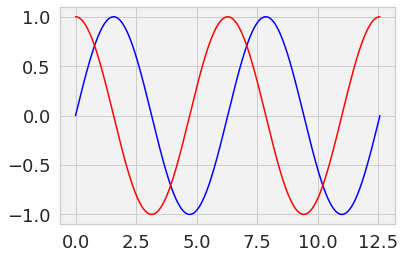

In [95]:
plt.plot(x, y, color='b')
plt.plot(x, dydx, color='r')

Qu'est ce qui c'est passé ici?

La node racine doit toujours être un scalar. Pour accomoder faire la derivative a plusieur point de la même fonction, nous utilisons la propriété des sommes envers leur dérivative.

$$ \frac{\partial\sum_i y(x_i)}{\partial x_j} = \frac{\partial y(x_j)}{\partial x_j} $$

## Another example

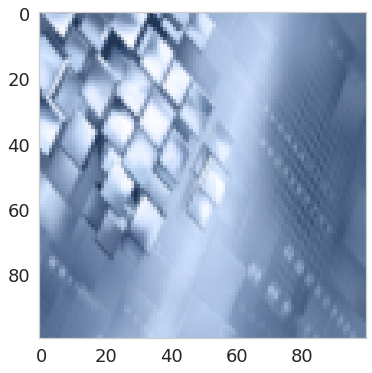

In [52]:
import PIL.Image as pim # python image library, or pillow (a fork of PIL)

img = pim.open(os.getcwd() + '/img/blue_image.jpg') 

img_r = img.resize((100,100), resample=pim.BILINEAR)
x = np.asarray(img_r).astype(np.float32)

plt.figure(figsize=(8,6))
plt.imshow(x)
plt.grid(False)

In [150]:
import torch.nn as nn

f = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=7, stride=1)

In [84]:
_x = torch.from_numpy(x).requires_grad_(True)
_y = f(torch.unsqueeze(_x.permute(2,0,1), 0))

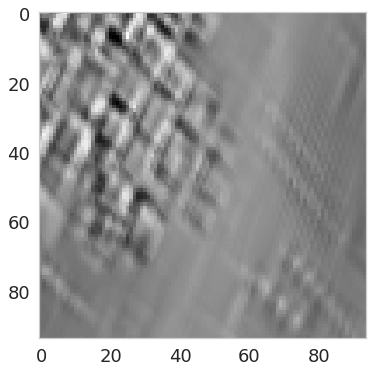

In [85]:
plt.figure(figsize=(8,6))
plt.imshow(_y[0,0].detach().numpy(), cmap='gray')
plt.grid(False)

In [86]:
torch.sum(_y**2).backward()
dydx = _x.grad.numpy()

In [87]:
print (dydx.shape)

(100, 100, 3)


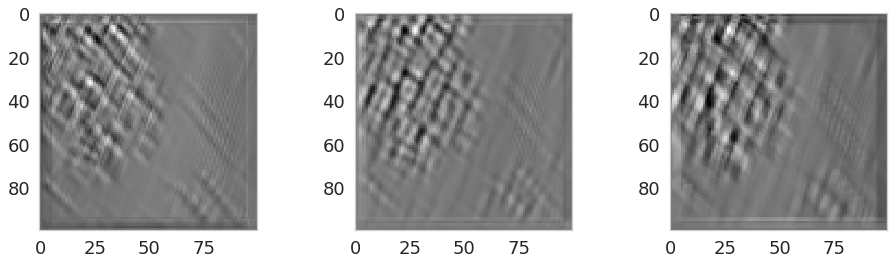

In [88]:
plt.figure(figsize=(16,4))
for k,img in enumerate(dydx.transpose((2,0,1))):
    plt.subplot(1,3,k+1)
    plt.imshow(img, cmap='gray')
    plt.grid(False)

## Quel est le type de la fonction $f$? 

In [89]:
print (type(f))

<class 'torch.nn.modules.conv.Conv2d'>


Cet objet, une sous-classe de type module, possede certain parametres

In [90]:
print ([p.size() for p in f.parameters()])

[torch.Size([1, 3, 7, 7]), torch.Size([1])]


## Utiliser le processeur graphique (si on en à un)

In [91]:
print ('#device:', torch.cuda.device_count())
print ('device#:', torch.cuda.current_device())
print ('device name:', torch.cuda.get_device_name(torch.cuda.current_device()))

#device: 3
device#: 0
device name: TITAN RTX


In [92]:
torch.manual_seed(time.time())
device = torch.device("cuda:0") #cuda
torch.backends.cudnn.enabled=True

print ('\ntorch:', torch.__version__)
print ('cuda: ', torch.version.cuda)
print ('cudnn:', torch.backends.cudnn.version())
print ('dtype:', torch.get_default_dtype())
#torch.set_default_dtype(torch.float64)


torch: 1.8.1+cu102
cuda:  10.2
cudnn: 7605
dtype: torch.float32


## On a un GPU, ou était notre tenseur précédent?

In [124]:
print (_y.device)

cuda:0


In [137]:
f = f.to(device)

_x = torch.from_numpy(x.astype(np.float32)).to(device).requires_grad_(True)

_y = f(torch.unsqueeze(_x.permute(2,0,1), 0))

In [138]:
print (_y.device)

cuda:0


In [139]:
print (_y.detach().cpu().numpy())

[[[[ 35.40182    54.188847   44.13312   ...  24.99371    24.84654
     23.812561 ]
   [  2.8820124  26.73505    24.366844  ...  25.456314   24.768349
     23.549423 ]
   [-22.475267   -4.5234637  -6.579531  ...  26.059877   24.46039
     24.315325 ]
   ...
   [ 17.343615   17.436884   21.237091  ...  31.08965    29.189308
     33.78127  ]
   [ 18.099844   20.106298   21.77074   ...  32.886936   28.298975
     32.48929  ]
   [ 18.966572   22.432768   21.4432    ...  34.007553   28.987406
     29.977701 ]]]]


In [140]:
torch.sum(_y**2).backward()

In [146]:
print (type(_x.grad))
print (_x.grad.device)

<class 'torch.Tensor'>
cuda:0


In [142]:
dydx = _x.grad.cpu().numpy()

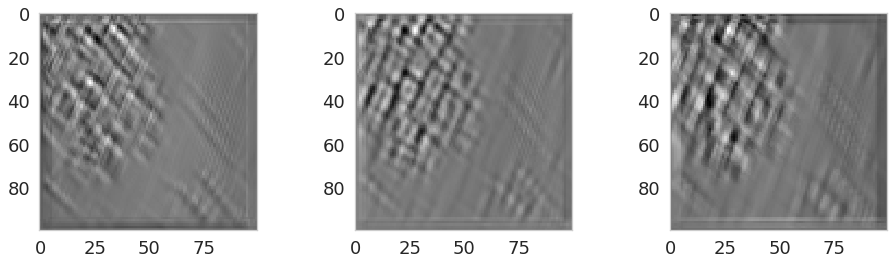

In [144]:
plt.figure(figsize=(16,4))
for k,img in enumerate(dydx.transpose((2,0,1))):
    plt.subplot(1,3,k+1)
    plt.imshow(img, cmap='gray')
    plt.grid(False)

## torch Modules
Toutes fonction complexe ayant plusieurs parametres peut être structuré dans un nouveau module. Un module inhérite tous les parametres de ces modules membres.

## Example: Alexnet

Classification des images est une des tâches de ML. Il est très difficile de créer manuellement une fonction addequate qui map une image vers un category d'une manière telle que le mapping généralise à de nouveux examples. Backprop est utilisé pour optimizer les parametres d'un tel model pour minimizer le niveau d'error de classification sur un ensemble (Objectif sur le 'training set'). La généralization est observé par la classification sur de nouveau example ('validation set').

### link to paper
https://arxiv.org/abs/1404.5997

In [159]:
# from torchvision implementation, source online

class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 1000) -> None:
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

## Importons les parametres final

In [157]:
#from .utils import load_state_dict_from_url
try:
    from torch.hub import load_state_dict_from_url
except ImportError:
    from torch.utils.model_zoo import load_url as load_state_dict_from_url

__all__ = ['AlexNet', 'alexnet']


model_urls = {
    'alexnet': 'https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth',
}


def build_alexnet(pretrained=False, progress=True, **kwargs):
    r"""AlexNet model architecture from the
    `"One weird trick..." <https://arxiv.org/abs/1404.5997>`_ paper.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    model = AlexNet(**kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls['alexnet'], progress=progress)       
        model.load_state_dict(state_dict)
    return model

In [158]:
alexnet = build_alexnet(pretrained=True)

Le alexnet module ce comporte comme une fonction. Le seule argument est un bloc d'images et les valeurs retournés sont les probabilités attribués à une longue liste de classes d'object qui pourrait être present.

# Sujets suivant:
- Comment choisir la forme de la fonction?
- Quel est l'objectif qui doit être optimizé?
- Comment utilisez le gradient pour optimizer l'objectif?
- Quelle sorte de regularization (prior) sur les parametre est optimal?
- Comment traiter des sequences?
- Comment traiter la recurrence dans le graphe computationel?

...

# Recommendation de livre gratuit
https://www.deeplearningbook.org/

## Lien interne

[Retourner au debut](#section_ID)